# Chapter 2 – End-to-end Machine Learning project

## 机器学习工程的主要步骤
1. Frame the problem and look at the big picture
2. Get the data.
3. Explore the data to gain insights
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models and combine them into a great solution
7. Present your solution
8. Launch, monitor, and maintain your system

### 明确问题定位及整体情况Frame the problem and look at the big picture
要做机器学习问题，首先应该明确问题本身的定位，仅仅是构建一个模型出来不是最终目的。花时间去弄明白企业如何使用该模型及如何从这模型中获益是非常重要的，因为这影响了后续如何明确问题的定位，该选择什么算法，该选择什么性能测量去评估模型，及该花费多大精力去调优模型，这样处理问题才能有的放矢。

机器学习系统中有很多的数据要做各式处理，转换等，甚至需要依次进行，这一系列数据处理过程组成的序列称为data pipeline。
pipeline中的各组件的执行相对独立，内部也通常是自包含的，互相之间通过数据存储进行数据交换，上一个的输出作为下一个的输入，相对划分清晰的各组件也可交给不同团队去实现。我们需要明白现在解决的问题是整个pipeline中的一步还是本身就是各小工程。

弄明白问题是什么后可以进一步思考明确下该问题：是监督，非监督还是强化学习？是分类还是回归？该用批量学习还是在线/增量学习...

本章作为示例的问题是california房价的预测，很明显这是个监督线性回归问题，给出的数据集也足够全部加载到内存中，因而选择批量学习方式即可...

作为模型好坏的分析，我们还要选择一个性能测量指标，对于分类问题来说，常用的是均方根误差Root Mean Square Error。

RMSE：均方根误差，是预测值与真值偏差的平方和与观测次数m比值的平方根
SD：标准差，方差的平方根，衡量的一组值自身的离散程度，与均值的比较。sigama，

明确问题清单：
1. 用业务术语定义目标
2. 问题解决后怎么使用？当前解决方案是怎样的
3. 明确问题（监督/非监督，在线/离线）
4. 性能测量标准
5.
### 获取数据Get the data.
获取数据集是模型训练的根本，没有数据再好的算法也得不出结果。另外真正工业界获取的数据并不一定是结构化的，需要经历ETL转换得到规整数据，得到规整数据后，当然还有后面的特征工程，识别其数据模式并必要时构建新特征

### 浏览数据得到器各特征的概貌


## 获取数据
首先是公共的输出图片的代码

In [16]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "1.end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

if os.path.exists(IMAGES_PATH) == False:
    os.makedirs(IMAGES_PATH)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

加载数据到housing中，下面进行数据的基本探索

In [4]:
HOUSING_PATH = os.path.join("datasets", "housing")
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


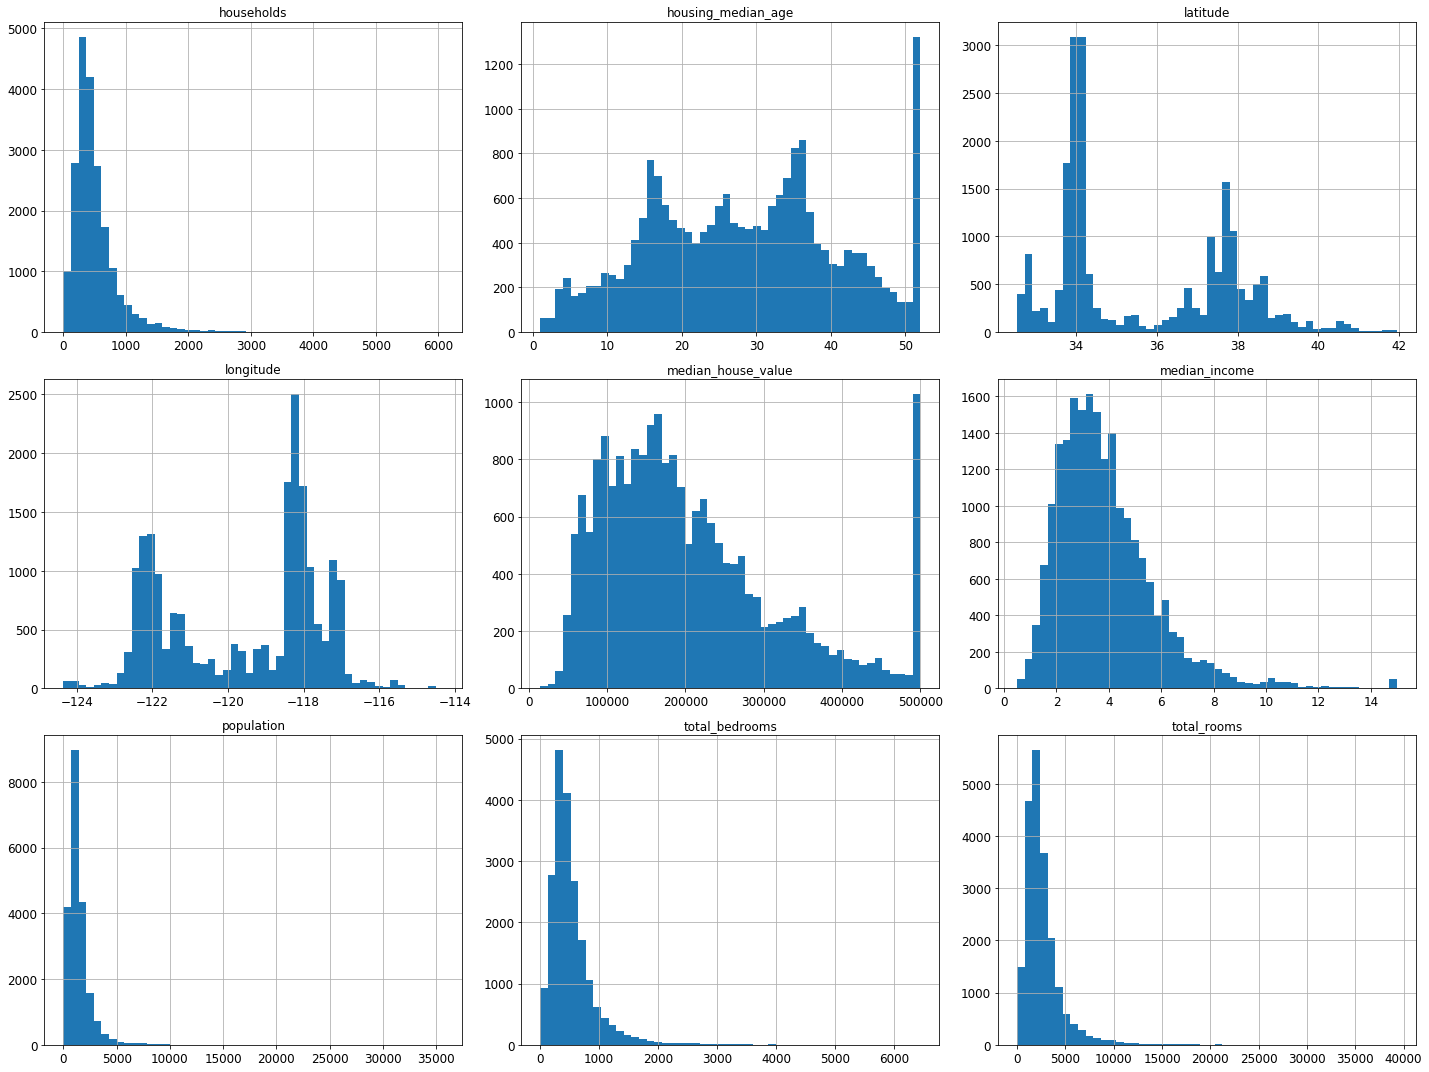

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

划分数据集，可以自己写分割策略，也可直接用sklearn的train_test_split函数。下面用train_test_split分割后依次查看train_test和test_set的数据分布直方图。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010A847F0>,
      dtype=object)

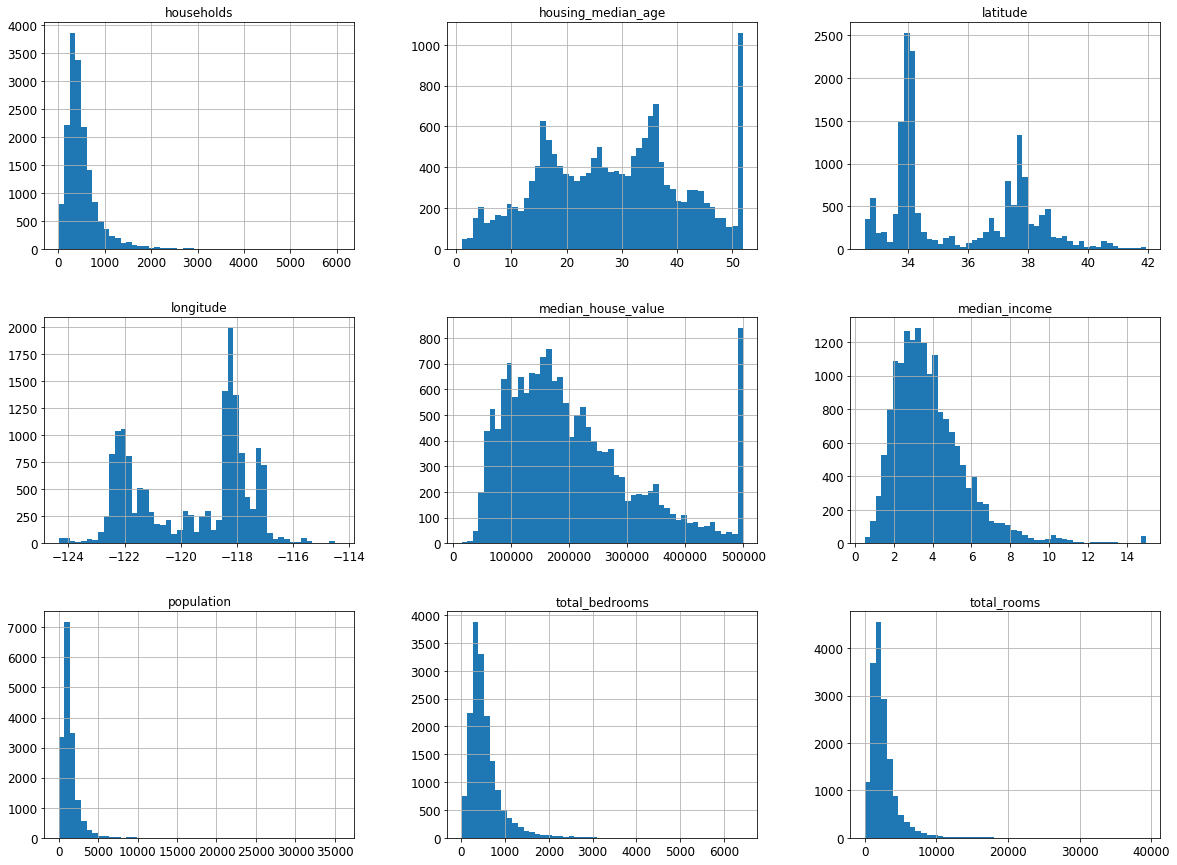

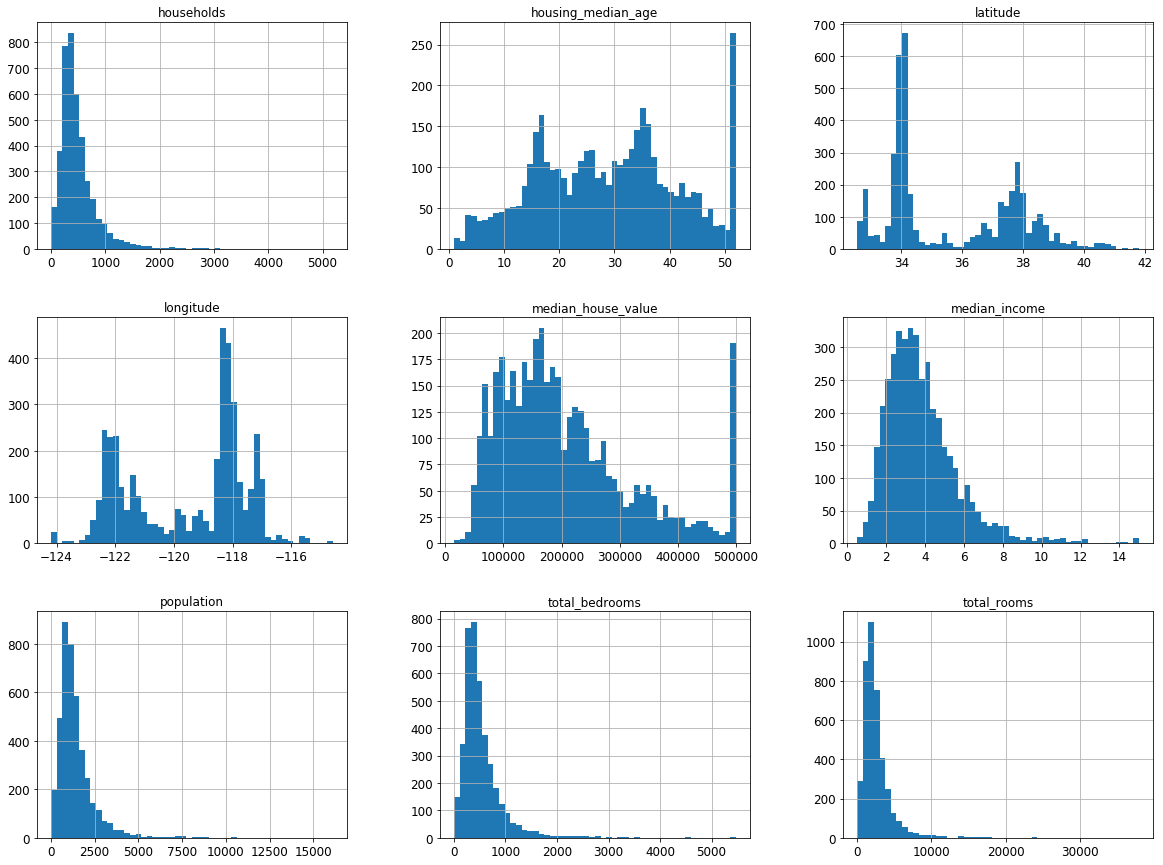

In [29]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

train_set.hist(bins=50, figsize=(20,15))

test_set.hist(bins=50, figsize=(20,15))

专门看下median_income的直方图，大部分价格在2-5万刀

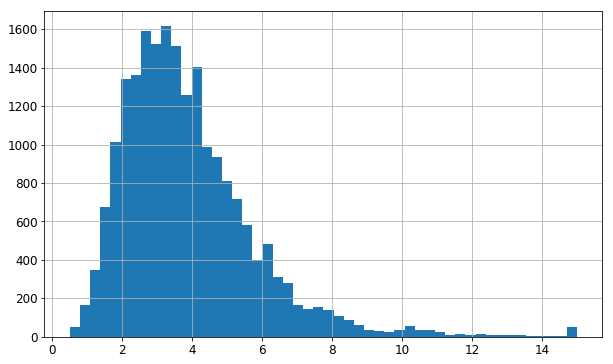

In [42]:
housing['median_income'].hist(bins=50, figsize=(10,6))

现在median_income是数值类型的，可以将其转为类型，离散值样的。为限制类型的总数，先将原值除以1.5，然后为了取整值，将其取ceil.
下面分别计算1-5五个取值中各个的占比

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

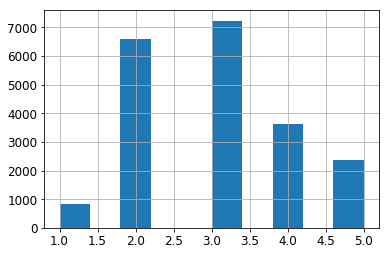

In [49]:
housing['income_cat']=np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']<5,5.0,inplace=True)
housing['income_cat'].hist()
housing['income_cat'].value_counts()/len(housing)

分别实验StratifiedShuffleSplit与train_set_split的分配后的数据集的分布，提供了一种保持按照指定属性的分布进行划分的方法。

In [70]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
s=split.split(housing,housing['income_cat'])
for trainindex,testindex in s:
    trainset=housing.loc[trainindex]
    testset=housing.loc[testindex]
    
print('total:\n',housing['income_cat'].value_counts()/len(housing))
print('StratifiedShuffleSplit:\n',trainset['income_cat'].value_counts()/len(trainset))

randtrainset,randtestset=train_test_split(housing,test_size=0.2,random_state=42)
print('train_test_split:\n',randtrainset['income_cat'].value_counts()/len(randtrainset))


total:
 3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64
StratifiedShuffleSplit:
 3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64
train_test_split:
 3.0    0.348595
2.0    0.317466
4.0    0.178537
5.0    0.115673
1.0    0.039729
Name: income_cat, dtype: float64


现在起可以主要拿trainset做实验

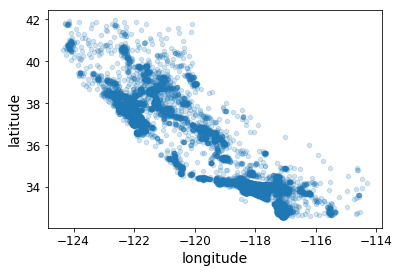

In [91]:

trainset.plot(kind="scatter",x="longitude",y="latitude",alpha=0.2)

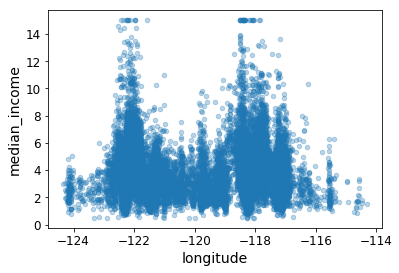

In [81]:
trainset.plot(kind='scatter',x="longitude",y="median_income",alpha=0.3)

可以用颜色及气泡大小更直观的展示数据，如下plot中s表示要根据气泡大小展示数据的列的取值，c表示颜色深浅, cmap则为colormap。图可见房价与是否靠海及其population度十分有关系。

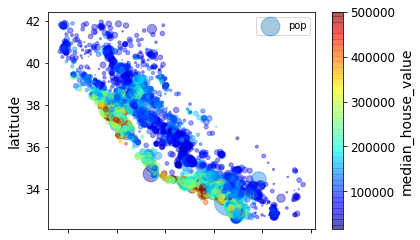

In [99]:
housing=trainset
housing.plot(kind='scatter',x="longitude",y="latitude",
             alpha=0.4,
             s=housing['population']/50,label="pop",
             c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,)

## Looking for Correlation
*standard correlation coefficient*(Pearson's r)皮尔森系数
相关系数的取值为-1到1，值接近1时，表示他们有强正相关性，值接近-1则表示他们有负相关性，值若接近0，则表示无线性相关性

In [97]:
corr_matrix=housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.016243
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,-0.078848
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.139385
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.221690
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.012502
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,0.022848
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,0.034995
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.902156
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.642274
income_cat,-0.016243,-0.078848,-0.139385,0.221690,0.012502,0.022848,0.034995,0.902156,0.642274,1.000000
